In [1]:
import pandas as pd

df = pd.read_csv('sampled_data.csv')

df_info = df.info()
df_nulls = df.isnull().sum()
df_describe = df.describe()
df_head = df.head()

df_info, df_nulls, df_describe, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   image_url_1                  500 non-null    object 
 1   category                     500 non-null    object 
 2   style                        494 non-null    object 
 3   colors                       478 non-null    object 
 4   gender                       495 non-null    object 
 5   pattern                      421 non-null    object 
 6   occasion                     494 non-null    object 
 7   accessory_type               0 non-null      float64
 8   more_attributes              155 non-null    object 
 9   bag_type                     0 non-null      float64
 10  belt_type                    0 non-null      float64
 11  material                     203 non-null    object 
 12  tops_fit                     240 non-null    object 
 13  sleeve_type         

(None,
 image_url_1                      0
 category                         0
 style                            6
 colors                          22
 gender                           5
 pattern                         79
 occasion                         6
 accessory_type                 500
 more_attributes                345
 bag_type                       500
 belt_type                      500
 material                       297
 tops_fit                       260
 sleeve_type                    256
 tops_length                    264
 overclothes_closure            456
 blazer_neckline_type           493
 underarm_sleeve_length         479
 neckline_type                  253
 sleeve_length                  263
 heels_width                    500
 heels_height                   499
 boots-shoe_type                500
 shoe_material                  500
 bracelet_type                  500
 overclothes_neckline_type      464
 overclothes_type               486
 waist_type          

In [2]:
# define labels
categorical_columns = ["category", "colors", "style", "gender", "occasion", "pattern"]

df = df.fillna("missing")

# drop columns with missing values that are not relevant for clothing
df = df.dropna(axis=1)

df_nulls = df.isnull().sum()
df_nulls

image_url_1                    0
category                       0
style                          0
colors                         0
gender                         0
pattern                        0
occasion                       0
accessory_type                 0
more_attributes                0
bag_type                       0
belt_type                      0
material                       0
tops_fit                       0
sleeve_type                    0
tops_length                    0
overclothes_closure            0
blazer_neckline_type           0
underarm_sleeve_length         0
neckline_type                  0
sleeve_length                  0
heels_width                    0
heels_height                   0
boots-shoe_type                0
shoe_material                  0
bracelet_type                  0
overclothes_neckline_type      0
overclothes_type               0
waist_type                     0
bottoms_length                 0
skirt_type                     0
skirt_leng

In [3]:
df.drop(columns=["image_url_1", "brand"], inplace=True)

In [4]:
df = pd.get_dummies(df, dtype=int)

In [5]:
import os

# specify the folder path
folder_path = 'images/'

# get the list of files in the folder
files_in_folder = os.listdir(folder_path)

# filter the dataframe to keep only the rows where the 'Name' column matches the files in the folder
df = df[df["barcode"].astype(str).add(".jpg").isin(files_in_folder)]
print(df)


            barcode  category_blazer  category_blouse  category_cardigan  \
0    48920502040101                0                0                  0   
1    50792701020101                0                0                  0   
2    50593801040101                0                0                  0   
3    47988301030101                0                0                  0   
4    48372601080101                0                0                  0   
..              ...              ...              ...                ...   
495  50665601040101                1                0                  0   
496  51126401030101                0                0                  0   
497  49975101020101                0                0                  0   
498  47879902020101                0                0                  1   
499  50548101050101                0                0                  0   

     category_coat  category_dress  category_hoodie  category_jacket  \
0              

In [6]:
df.to_csv('data.csv')

Image shape: torch.Size([3, 256, 256])
Labels: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

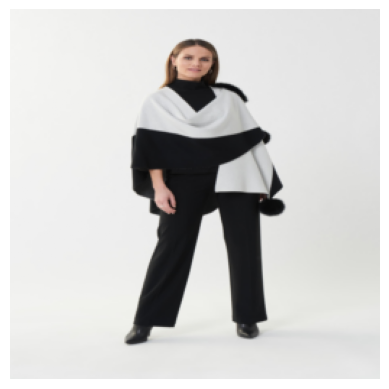

In [10]:
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset
import torch
import pandas as pd
import os

class FashionDataset(Dataset):
    def __init__(self, csv_file, image_folder, transform=None):
        self.data = pd.read_csv(csv_file)
        self.image_folder = image_folder
        self.transform = transform

        # Extract image paths and multi-label targets
        self.image_paths = self.data["barcode"].astype(str) + ".jpg"
        self.labels = self.data.iloc[:, 2:].values
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.image_folder, self.image_paths[idx])
        
        # Check if the image file exists
        if not os.path.exists(img_path):
            print(f"Image file {img_path} does not exist.")
            return None, None
        
        # load the image and transform
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        
        # Convert labels to tensor (multi-label classification)
        labels = torch.tensor(self.labels[idx], dtype=torch.float32)
        
        return image, labels

# Define image transformations
image_transforms = transforms.Compose([
    transforms.Resize((256, 256)),  
    transforms.ToTensor()
])

# Load Dataset
dataset = FashionDataset(csv_file="data.csv", image_folder="images/", transform=image_transforms)

# Test Dataset Loading
image, labels = dataset[9]
if image is not None and labels is not None:
    print("Image shape:", image.shape)
    print("Labels:", labels)

    import matplotlib.pyplot as plt
    plt.imshow(image.permute(1, 2, 0))
    plt.axis("off")  
    plt.show()
else:
    print("Image or labels not found.")


In [11]:
from torch.utils.data import DataLoader, random_split

# Set train-test split ratio
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Training samples: {len(train_dataset)}, Test samples: {len(test_dataset)}")
print(f"Training batches: {len(train_loader)}, Test batches: {len(test_loader)}")

Training samples: 395, Test samples: 99
Training batches: 13, Test batches: 4


In [12]:
import torch.nn as nn
import torch.nn.functional as F

class FashionCNN(nn.Module):
    def __init__(self, num_classes):
        super(FashionCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(256 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes) 
        
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        
        x = x.view(x.size(0), -1)
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        
        x = torch.sigmoid(self.fc3(x))
        return x

# Number of labels from CSV
num_classes = dataset.labels.shape[1]
model = FashionCNN(num_classes)
model

FashionCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=65536, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=476, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [13]:
import torch.optim as optim

# Define Loss and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training Loop
num_epochs = 13

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1} - Training loss: {running_loss/len(train_loader)}")

print("Finished Training")


Epoch 1 - Training loss: 0.593398236311399
Epoch 2 - Training loss: 0.43832369721852815
Epoch 3 - Training loss: 0.2854797186759802
Epoch 4 - Training loss: 0.18723851556961352
Epoch 5 - Training loss: 0.1455200406221243
Epoch 6 - Training loss: 0.12809081432911065
Epoch 7 - Training loss: 0.11759012192487717
Epoch 8 - Training loss: 0.11209545456446134
Epoch 9 - Training loss: 0.10754831192585138
Epoch 10 - Training loss: 0.10288805629198368
Epoch 11 - Training loss: 0.0993770406796382
Epoch 12 - Training loss: 0.09660194470332219
Epoch 13 - Training loss: 0.0931722974547973
Finished Training


In [30]:
import matplotlib.pyplot as plt
import numpy as np

# select a random sample from the dataset
sample_idx = np.random.randint(len(test_dataset))
image, normalized_labels = test_dataset[sample_idx]
torch.set_printoptions(threshold=10_000)
normalized_labels

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [32]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        predictions = (outputs > 0.5).float()  # Convert to binary values

        correct += (predictions == labels).sum().item()
        total += labels.numel()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9753


In [36]:
predictions[2]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 